### 가중치 초기화 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.initializers import Zeros, RandomNormal, glorot_normal, glorot_uniform

In [5]:
# 뉴런 갯수 지정 
n_input = 784
n_dense = 256

# 절편 초기값으르 0으로 지정 
b_init = Zeros()

# 가중치 초기값 지정 (표준 정규분포에서 랜덤하게 추출)
w_init = RandomNormal(mean=0.0, stddev=1.0)

In [7]:
# 신경망 
model = Sequential()
model.add(Dense(n_dense, 
                input_dim = n_input, 
                kernel_initializer = w_init, 
                bias_initializer = b_init
                ))
model.add(Activation('sigmoid'))

/Users/yb_choi/Downloads/yes/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-15 21:14:48.092283: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-06-15 21:14:48.092338: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-15 21:14:48.092350: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-06-15 21:14:48.092382: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-15 21:14:48.092397: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory

In [9]:
# 랜덤한 x값 생성 
x = np.random.random((1, n_input))
x

array([[0.64739149, 0.16093656, 0.62822972, 0.99250024, 0.89717594,
        0.60625983, 0.64956913, 0.54463627, 0.36330601, 0.51457233,
        0.47378273, 0.26383766, 0.85048641, 0.8003548 , 0.49233895,
        0.62384111, 0.16871608, 0.05282168, 0.72628507, 0.91806685,
        0.01771784, 0.29295112, 0.5354229 , 0.15260331, 0.98598167,
        0.4238743 , 0.4298384 , 0.99501498, 0.94409762, 0.8897698 ,
        0.41231693, 0.63300103, 0.72871216, 0.88932506, 0.76937156,
        0.70125765, 0.20006022, 0.5298711 , 0.5214196 , 0.73779555,
        0.91162062, 0.48178673, 0.20841581, 0.9920533 , 0.27632953,
        0.52471052, 0.68391952, 0.32640893, 0.28759352, 0.63849909,
        0.42875843, 0.475546  , 0.43702865, 0.10057621, 0.34692215,
        0.78826157, 0.99843048, 0.33581478, 0.89656145, 0.6928689 ,
        0.43647937, 0.48732739, 0.65584691, 0.03135525, 0.96925797,
        0.77783715, 0.53140968, 0.40798974, 0.24913439, 0.90869629,
        0.12708685, 0.56396763, 0.0944665 , 0.30

In [10]:
a = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


2025-06-15 21:17:15.566662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [18]:
print(a) 

[[1.00000000e+00 4.22798423e-03 9.99998689e-01 2.74142309e-07
  6.00187341e-04 9.96113300e-01 9.99994040e-01 9.67877090e-01
  3.14043405e-06 9.99932766e-01 9.99984145e-01 9.82016623e-01
  1.00000000e+00 9.89502013e-01 9.99638677e-01 1.00000000e+00
  9.87149835e-01 1.00000000e+00 9.99998093e-01 2.26608302e-10
  5.23931419e-07 2.52421778e-02 8.64910185e-02 1.70963965e-02
  9.99928951e-01 9.99986172e-01 9.99996305e-01 5.21147609e-01
  3.40278447e-01 9.79452610e-01 9.95534658e-01 1.00000000e+00
  3.39583639e-04 8.90325555e-06 2.38132896e-04 1.25568844e-15
  5.50241415e-11 5.82862578e-11 5.80743381e-06 3.63870175e-13
  1.00000000e+00 9.99981165e-01 1.99152646e-03 1.12595687e-15
  5.30298257e-06 7.51118467e-04 9.99999881e-01 3.96388536e-03
  4.07451706e-04 1.96946098e-06 3.26475623e-04 1.00000000e+00
  2.21082814e-08 1.14568335e-04 9.99795258e-01 1.87853858e-01
  9.99999881e-01 1.00000000e+00 8.02474678e-01 9.99999762e-01
  9.29371238e-01 1.00409435e-02 1.01351499e-04 9.99999166e-01
  9.9987

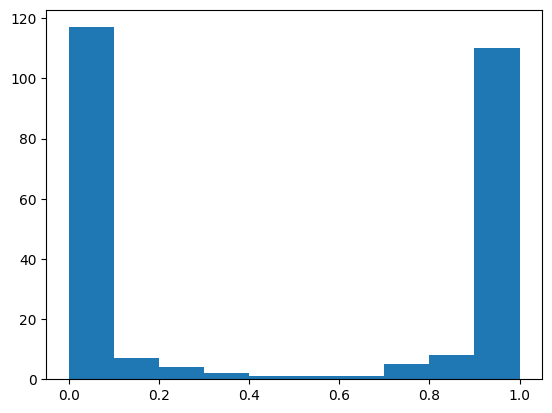

In [19]:
_ = plt.hist(np.transpose(a))

- 시그모이드 활성화 함수의 출력결과가 0~1사이 이기는 하나, 양 극단에 몰려 있음 
- 즉 정규분포에서 샘플링한 초기값 사용은 훈련에 적합하지 않음 
- 때문에 일반적으로 글로럿 초기화를 사용한다 (절편=0, 가중치=글로럿 분포에서 랜덤 샘플링)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/Users/yb_choi/Downloads/yes/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


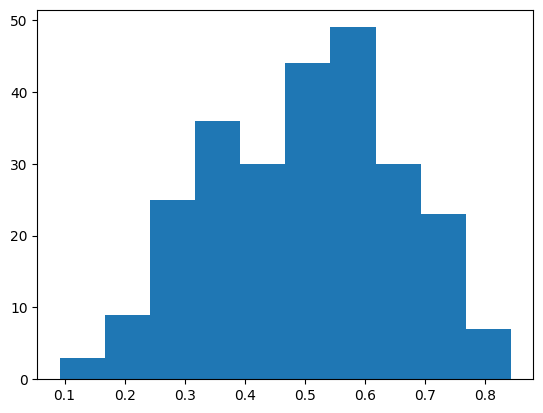

In [20]:
## 글로럿 초기화를 지정한 후 재실행 
w_init = glorot_normal()

# 신경망 
model = Sequential()
model.add(Dense(n_dense, 
                input_dim = n_input, 
                kernel_initializer = w_init, 
                bias_initializer = b_init
                ))
model.add(Activation('sigmoid'))

# 랜덤한 x값 생성 
x = np.random.random((1, n_input))

aa = model.predict(x)

_ = plt.hist(np.transpose(aa))